**Introduction**

Dans ce projet, je cherche à détecter la cataracte sur des images médicales des yeux à l’aide de modèles de deep learning en Python. 
Mon objectif est de construire un système capable de classer automatiquement les images comme "Cataracte" ou "Normale", 
ce qui pourrait être utile pour assister les professionnels de santé dans le diagnostic.

Pour réaliser ce projet, j’utilise :
Python et ses bibliothèques de data science : NumPy, Pandas, Matplotlib et Seaborn.

OpenCV : Pour le traitement et la manipulation des images.

TensorFlow/Keras : Pour créer et entraîner des modèles de deep learning.

CNN : Simple et transfert learning avec VGG16 pour comparer les performances et obtenir le meilleur modèle.

Le projet suit plusieurs étapes : prétraitement et redimensionnement des images, visualisation et vérification des données, 
création de générateurs d’images avec augmentation, construction et entraînement des modèles, et évaluation de leurs performances.

**Importation des bibliothèque**

In [1]:
# !pip install -q kaggle opencv-python matplotlib seaborn tensorflow scikit-learn
# Installer seulement si pas déjà installé

import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint , ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
# import optuna  # retiré pour éviter ModuleNotFoundError




2025-12-04 10:09:25.628289: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


- Gestion de fichiers et dossiers : os, zipfile.

- Manipulation de données : numpy, pandas.

- Visualisation : matplotlib, seaborn.

- Traitement d'images : cv2 (OpenCV).

- Machine learning et deep learning : tensorflow.keras.

**Chargement des images**

In [2]:
# Dossier contenant mes images
train_dir = '/Users/hugorischmann/Public/Documents/hackaton/processed_images/train'

# Répertoire des deux classes (Malade et normal)
cataract_dir = os.path.join(train_dir, 'cataract')
normal_dir = os.path.join(train_dir, 'normal')

# Fonction pour charger et afficher des images sans limite
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
    return images

# Charger toutes les images des deux classes
cataract_images = load_images_from_folder(cataract_dir)
normal_images = load_images_from_folder(normal_dir)


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

- Les images sont chargées depuis deux dossiers : cataracte et normal.

- Conversion en RGB pour compatibilité avec Keras.

**Visualisation**

Ici j'affiche les premières images pour vérifier visuellement les données.

In [3]:
def display_images(images, labels, num_images=5):
    fig, ax = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        ax[i].imshow(images[i])
        ax[i].axis('off')
        ax[i].set_title('Cataract' if labels[i] == 1 else 'Normal')
    plt.show()

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

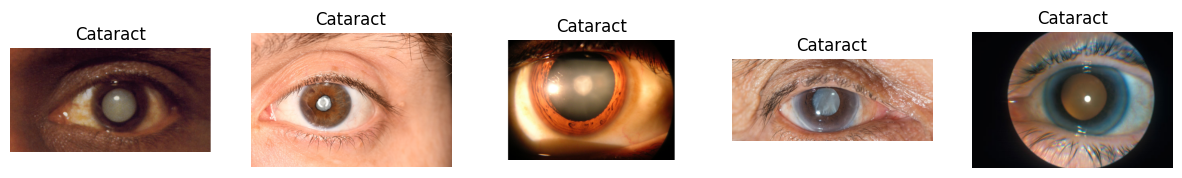

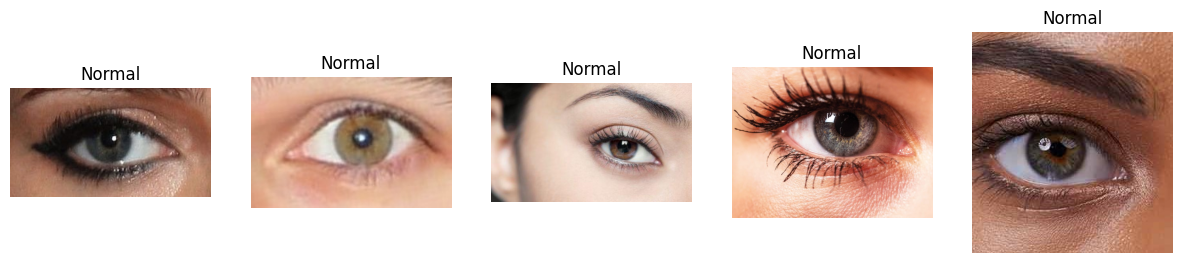

In [4]:
# Charger quelques images de chaque classe
cataract_images = load_images_from_folder(cataract_dir)
normal_images = load_images_from_folder(normal_dir)

# Affichage
display_images(cataract_images, [1] * len(cataract_images), num_images=5)
display_images(normal_images, [0] * len(normal_images), num_images=5)

**Vérification et redimensionnement des images**

In [5]:
# Vérifier la taille des images (doivent être toutes les mêmes)
def check_image_sizes(images):
    sizes = [img.shape for img in images]
    unique_sizes = set(sizes)
    if len(unique_sizes) > 1:
        print(f"Les images ont des tailles différentes : {unique_sizes}")
    else:
        print(f"Toutes les images ont la même taille : {unique_sizes}")

check_image_sizes(cataract_images)
check_image_sizes(normal_images)

Les images ont des tailles différentes : {(466, 700, 3), (330, 600, 3), (626, 829, 3), (853, 1280, 3), (1120, 1543, 3), (285, 461, 3), (409, 615, 3), (1001, 1500, 3), (267, 400, 3), (587, 880, 3), (478, 640, 3), (768, 768, 3), (800, 1280, 3), (400, 400, 3), (820, 1186, 3), (719, 1000, 3), (807, 1180, 3), (115, 154, 3), (265, 400, 3), (733, 2200, 3), (177, 200, 3), (136, 200, 3), (175, 250, 3), (288, 340, 3), (415, 1024, 3), (777, 1166, 3), (619, 1100, 3), (367, 550, 3), (224, 400, 3), (375, 520, 3), (1080, 1920, 3), (241, 269, 3), (213, 320, 3), (307, 321, 3), (350, 850, 3), (3168, 4752, 3), (470, 701, 3), (640, 640, 3), (221, 650, 3), (183, 241, 3), (116, 165, 3), (1000, 1500, 3), (403, 642, 3), (315, 493, 3), (305, 611, 3), (480, 800, 3), (401, 602, 3), (500, 750, 3), (338, 508, 3), (2528, 3684, 3), (431, 646, 3), (1000, 1000, 3), (391, 600, 3), (539, 800, 3), (716, 1024, 3), (541, 1024, 3), (512, 512, 3), (250, 400, 3), (275, 400, 3), (272, 400, 3), (864, 1314, 3), (218, 300, 3), (1

In [6]:
# Fonction pour redimensionner les images
def resize_images(images, target_size=(224, 224)):
    resized_images = [cv2.resize(img, target_size) for img in images]
    return resized_images

# Redimensionner les images de chaque classe
cataract_images_resized = resize_images(cataract_images)
normal_images_resized = resize_images(normal_images)


- Je vérifie si toutes les images ont la même taille (important pour pour le model CNN).

- Redimensionne toutes les images à 224x224 pixels.

Toutes les images ont la même taille : {(224, 224, 3)}
Toutes les images ont la même taille : {(224, 224, 3)}


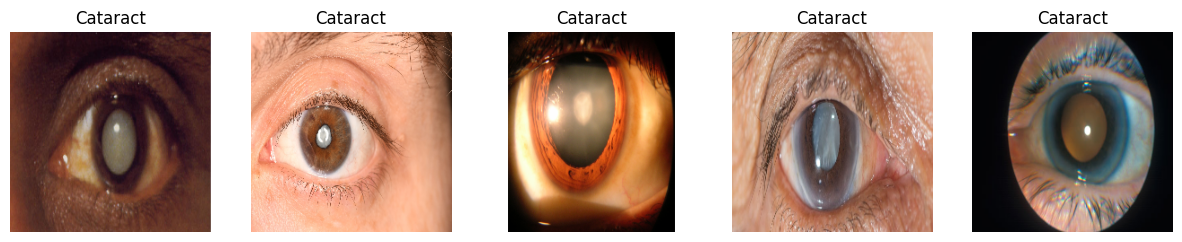

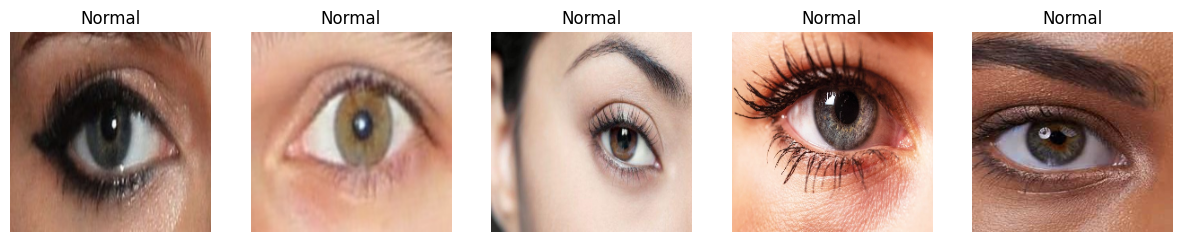

In [7]:
# Vérifier la taille après redimensionnement
check_image_sizes(cataract_images_resized)
check_image_sizes(normal_images_resized)

# Affichage
display_images(cataract_images_resized, [1] * len(cataract_images_resized), num_images=5)
display_images(normal_images_resized, [0] * len(normal_images_resized), num_images=5)

Toutes les images sont en 224x224 pixels

**Vérification des images corrompues**

In [8]:
# Fonction pour vérifier les images redimensionnées corrompues
def check_for_corrupted_images_resized(images):
    corrupted_files = []
    for idx, img in enumerate(images):
        if img is None or img.size == 0:  # Vérifier si l'image est vide
            corrupted_files.append(idx)  # On utilise l'index des images corrompues
    return corrupted_files

# Vérifier les images corrompues dans les images redimensionnées
corrupted_cataract_resized = check_for_corrupted_images_resized(cataract_images_resized)
corrupted_normal_resized = check_for_corrupted_images_resized(normal_images_resized)

print(f"Images corrompues dans cataracte (redimensionnées) : {corrupted_cataract_resized}")
print(f"Images corrompues dans normal (redimensionnées) : {corrupted_normal_resized}")

Images corrompues dans cataracte (redimensionnées) : []
Images corrompues dans normal (redimensionnées) : []


In [9]:
# Calcul de la répartition des classes dans les images redimensionnées
num_cataract_resized = len(cataract_images_resized)
num_normal_resized = len(normal_images_resized)
total_images_resized = num_cataract_resized + num_normal_resized

print(f"Répartition des classes (redimensionnées) :")
print(f"Nombre d'images de cataracte : {num_cataract_resized}")
print(f"Nombre d'images normales : {num_normal_resized}")
print(f"Total d'images : {total_images_resized}")

Répartition des classes (redimensionnées) :
Nombre d'images de cataracte : 245
Nombre d'images normales : 246
Total d'images : 491


**Préparation des générateurs d’images**

In [10]:
# Définir le générateur d'images avec augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisation des pixels entre 0 et 1
    shear_range=0.2,  # Appliquer un cisaillement
    zoom_range=0.2,  # Appliquer un zoom aléatoire
    horizontal_flip=True  # Retourner les images horizontalement
)

# Charge les images et prépare les générateurs d'entraînement
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Le répertoire contenant les images
    target_size=(224, 224),  # Redimensionner les images
    batch_size=16,  # Taille du batch
    class_mode='binary'  # Classification binaire (cataracte vs normal)
)

# Créer le générateur pour les données de test
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalisation des images

# Chemin vers le répertoire de test
test_dir = '/Users/hugorischmann/Public/Documents/hackaton/processed_images/test'  
# Créer le générateur de test
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Redimensionner les images à la taille d'entrée du modèle (224x224)
    batch_size=32,  # Taille du batch
    class_mode='binary'  # Classification binaire (cataracte vs normal)
)

# Vérification du générateur de test
print(f"Test Generator created: {test_generator.samples} images found.")

Found 491 images belonging to 2 classes.
Found 121 images belonging to 2 classes.
Test Generator created: 121 images found.


Normalisation : pixels entre 0 et 1.

Augmentation de données : cisaillement, zoom, flip horizontal pour éviter le sur-apprentissage.

Création des générateurs pour le modèle Keras.

**Callbacks pour l’entraînement**

In [11]:

# EarlyStopping : Arrêter l'entraînement dès que la perte de validation cesse d'améliorer
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ReduceLROnPlateau : Réduire le taux d'apprentissage si la perte de validation ne s'améliore plus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

- EarlyStopping : arrête l’entraînement si la validation n’améliore plus la perte.

- ReduceLROnPlateau : réduit le learning rate si le modèle stagne.

**Création d’un CNN simple**

In [12]:
# Construire un modèle CNN simple
cnn_model = Sequential([
    # Première couche convolutive
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),  # Pooling
    # Deuxième couche convolutive
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Troisième couche convolutive
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),  # Aplatir l'entrée pour la couche dense
    Dense(128, activation='relu'),  # Couche dense
    Dropout(0.5),  # Dropout pour réduire le sur-apprentissage
    Dense(1, activation='sigmoid')  # Sigmoid pour la classification binaire
])

# Compiler le modèle
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Transfert learning avec VGG16**

In [13]:
# Charger VGG16 pré-entraîné sans la couche de classification finale
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Geler les poids du modèle de base pour ne pas les entraîner
base_model.trainable = False

# Construire le modèle avec transfert learning pour la classification binaire
model_transfer = models.Sequential([
    base_model,  # VGG16 comme base
    layers.GlobalAveragePooling2D(),  # Appliquer un pooling global pour réduire les dimensions
    layers.Dense(128, activation='relu'),  # Couche dense pour l'apprentissage de caractéristiques plus complexes
    layers.Dense(1, activation='sigmoid')  # 1 neurone et sigmoid pour classification binaire
])

# Compiler le modèle
model_transfer.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

**Entraînement et évaluation**

In [14]:
cnn_history = cnn_model.fit(
    train_generator,  # Le générateur d'images avec augmentation
    steps_per_epoch=31,  # Calculé en fonction du nombre d'images et de la taille du batch (491 images / 16 batch size = 31)
    epochs=20,  # Nombre d'époques d'entraînement
    validation_data=test_generator,  # Générateur de validation
    validation_steps=50,  # Nombre de steps pour la validation (ajuste en fonction du jeu de test)
    callbacks=[early_stopping, reduce_lr]  # Early stopping et learning rate scheduler
)

history = model_transfer.fit(
    train_generator,  # Générateur d'entraînement
    steps_per_epoch=31,  # Calculé en fonction du nombre d'images et de la taille du batch
    epochs=20,  # Nombre d'époques
    validation_data=test_generator,  # Générateur de validation
    validation_steps=50,  # Nombre de steps pour la validation
    callbacks=[early_stopping, reduce_lr]  # Early stopping et learning rate scheduler
)

# Évaluation du modèle CNN sur les données de test
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_generator, steps=50)
print(f"Test accuracy of the transfer learning model: {cnn_test_acc}")
print(f"Test loss of the transfer learning model: {cnn_test_loss}")


# Évaluation du modèle transféré (MobileNetV2, VGG16, etc.) sur les données de test
test_loss, test_acc = model_transfer.evaluate(test_generator, steps=50)
print(f"Test accuracy of the transfer learning model: {test_acc}")
print(f"Test loss of the transfer learning model: {test_loss}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.5551 - loss: 0.7980 - val_accuracy: 0.7107 - val_loss: 0.5093 - learning_rate: 0.0010
Epoch 2/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


31/31 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.7606 - loss: 0.4822 - val_accuracy: 0.8595 - val_loss: 0.4279 - learning_rate: 0.0010
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.8534 - loss: 0.4104 - val_accuracy: 0.8430 - val_loss: 0.3807 - learning_rate: 0.0010
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.8322 - loss: 0.3810 - val_accuracy: 0.8760 - val_loss: 0.3750 - learning_rate: 0.0010
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.8543 - loss: 0.3571 - val_accuracy: 0.8843 - val_loss: 0.3632 - learning_rate: 0.0010
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.8784 - loss: 0.3273 - val_accuracy: 0.8926 - val_loss: 0.3380 - learning_rate: 0.0010
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.8788 - loss: 0.2837 - val_accuracy: 0.8512 - val_loss: 0.3442 - learning_rate: 0.0010
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.8897 - loss: 0.2648 - val_accuracy: 0.8760 - va

Entraîne le CNN simple et le modèle VGG16 (transfert learning).

Évalue les performances sur les données de test.

**Sauvegarde des modèles**

In [15]:
#enregistrer les modèles dans mes fichiers pour eviter de devoir refaire l'entrainement a chaque utilisation
cnn_model.save("/Users/hugorischmann/Public/Documents/hackaton/model_cnn.h5")
model_transfer.save("/Users/hugorischmann/Public/Documents/hackaton/model_transfer.h5")

**En gros**

Ce projet a permis de mettre en place une chaîne complète de traitement et de classification d’images, depuis leur préparation jusqu’à l’évaluation finale du modèle. j'ai commencé par charger et visualiser les images afin d’en vérifier la qualité et de comprendre la distribution des données. Une étape de vérification et de redimensionnement a ensuite été appliquée pour garantir une homogénéité indispensable au bon fonctionnement des modèles de deep learning.

La préparation des générateurs, enrichie par des techniques d’augmentation de données, a joué un rôle essentiel pour renforcer la robustesse du modèle et limiter les risques de surapprentissage. Deux approches ont alors été mises en œuvre : la construction d’un CNN simple pour établir une première base de performance, puis l’utilisation du transfert learning avec VGG16 afin de tirer parti d’un modèle pré-entraîné plus performant.

L’entraînement a été optimisé grâce à l’utilisation de callbacks permettant d’ajuster automatiquement le taux d’apprentissage ou d’arrêter le processus lorsque les performances ne progressaient plus. Enfin, une évaluation sur le jeu de test a permis de mesurer les performances finales, tandis que les modèles entraînés ont été sauvegardés pour un usage ou un déploiement ultérieur.
